# Analysing the Stock Market with Python - Part II

This notebook explains how to optimise your portfolio, and get other suggestions based on different theories and equations, and other **interesting** stuff.<br>


## Portfolio Optimization

References:
- [An Introduction to Portfolio Optimization in Python](https://builtin.com/data-science/portfolio-optimization-python)
- [Portfolio Optimization with Python using Efficient Frontier](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#4-modern-portfolio-theory-mpt-)
- [Portfolio Optimization Using MPT in Python](https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/)

1. <font color='orange'>What does a portfolio mean?</font>
An investor’s portfolio is basically his/her investment in different kinds of assets from different companies.
2. <font color='orange'>What is portfolio optimization?</font>
Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.
3. <font color='orange'>What are assets, returns and risk?</font>
An asset is what you would purchase if you want to invest in a company. There are many kinds of **assets** such as stocks, shares, bonds, mutual funds, exchange-traded funds (ETFs), etc. <br>
The profit from this investment is called **returns**.<br>
But what if you have purchased the company's stocks and the company goes bankrupt?<br>
This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.<br>
This is called the **risk** of investment.
4. <font color='orange'>Modern Portfolio Theory (MPT)</font>
or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.
5. <font color='orange'>Markowitz Method (Mean Variance Optimization)</font>
Developed by Harry Markowitz. This method is a specific implementation of MPT that is used to build portfolios of stocks, by assuming investors are risk-averse. Specifically, it selects a set of assets that are least correlated (i.e. different from each other) and that generate the highest returns.
6. <font color='orange'>What is Efficient Frontier?</font>
Efficient Frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.<br>
Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

In each of these cases, the task of optimizing assets involves balancing the trade-offs between risk and return, where **return** on a stock is the profits realized after a period of time and **risk** is the standard deviation in an asset's value.

<font color='orange'>*The idea here is that having a portfolio of **different types of assets** is less risky than having ones that are similar.*</orange>

In [7]:
import yfinance as yf
# import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
sns.set()
from plotly import express as px
import datetime as dt
import os

pd.options.display.float_format = '{:,.3f}'.format
# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 1000

-------------------------------------------
# *Download Data from* <font color='purple'>Yahoo!</font>

[List of SP500 Companies](https://www.liberatedstocktrader.com/sp-500-companies/)

Let’s pull the price data for stocks in the various industries using `yf.download` (Recommended):

**Healthcare**: Moderna (MRNA), Pfizer (PFE), Johnson & Johnson (JNJ)

**Tech**: Google (GOOGL), Facebook (META), Apple (AAPL), Microsoft (MSFT)

**Retail**: Costco (COST), Walmart (WMT),  Kroger Co (KR)

**Finance**: JPMorgan Chase & Co (JPM), Bank of America (BAC), HSBC Holding (HSBC)

**Others**: SPDR S&P 500 ETF Trust (SPY), SPDR Gold Trust (GLD), Nikkei 225 (^N225), Crude Oil (CL=F), Bitcoin (BTC-USD)

In [8]:
# !pip install yfinance
import yfinance as yf
# !pip install pandas_datareader    #Pandas_Datareader library to pull stock price data
from pandas_datareader import data as pdr
from functools import reduce
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format

startdate = '2019-01-01'
enddate = '2022-12-31'
# enddate =  dt.datetime.now().date()    #change to current day date if required
stocknames = ['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'MSFT', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC', 'SPY', 'GLD', '^N225', 'CL=F', 'BTC-USD']    #ticker
data_frames = []

def get_stock_data(ticker):
    '''to download stock price data from yahoo finance'''
    df = pdr.get_data_yahoo(ticker, startdate, enddate)
    df[ticker] = df['Adj Close']
    return df[[ticker]]

#get a single dataframe of stock values
yf.pdr_override()
for ticker in stocknames:
    data_frames.append(get_stock_data(ticker))
df = reduce(lambda left, right: pd.merge(left, right, on=['Date'], how='inner'), data_frames)
# df.to_csv('portfolio.csv')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,MRNA,PFE,JNJ,GOOGL,META,AAPL,MSFT,COST,WMT,KR,JPM,BAC,HSBC,SPY,GLD,^N225,CL=F,BTC-USD
Date,,,,,,,,,,,,,,,,,,
2019-01-04,16.960,34.531,113.360,53.903,137.950,35.670,97.194,193.807,86.614,25.149,87.867,23.020,33.480,234.361,121.440,"19,561.961",47.960,"3,857.718"
2019-01-07,16.270,34.716,112.633,53.796,138.050,35.591,97.318,194.521,87.633,25.385,87.928,23.002,33.029,236.209,121.860,"20,038.971",48.520,"4,025.248"
2019-01-08,16.950,34.877,115.249,54.269,142.530,36.269,98.024,195.977,88.245,25.876,87.762,22.957,33.118,238.428,121.530,"20,204.039",49.780,"4,030.848"
2019-01-09,16.330,34.805,114.336,54.083,144.230,36.885,99.426,197.246,87.958,25.504,87.614,23.182,33.343,239.542,122.310,"20,427.061",52.360,"4,035.296"
2019-01-10,16.480,33.977,115.028,53.942,144.200,37.003,98.787,197.941,88.023,25.894,87.605,23.155,33.416,240.387,121.590,"20,163.801",52.590,"3,678.925"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,199.080,50.809,174.893,89.230,118.040,131.477,237.614,460.885,142.641,45.383,128.421,32.005,29.618,380.042,167.260,"26,235.250",79.560,"16,796.953"
2022-12-27,180.170,50.123,174.844,87.390,116.880,129.652,235.852,456.751,142.681,45.442,128.871,32.065,29.743,378.544,168.670,"26,447.869",79.530,"16,717.174"
2022-12-28,176.500,49.799,174.085,86.020,115.620,125.674,233.434,451.262,140.181,44.087,129.575,32.301,29.705,373.839,167.910,"26,340.500",78.960,"16,552.572"


downloading data using Using yf.download (same output)

*Define stock names, Start date, End date, and interval*

In [28]:
# !pip install yfinance
import yfinance as yf
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format

stocknames = ['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'MSFT', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC', 'SPY', 'GLD', '^N225', 'CL=F', 'BTC-USD']    #ticker
startdate = '2019-01-01'
enddate = '2022-12-31'
# enddate =  dt.datetime.now().date()    #change to current day date if required
interval = '1d'

for stock in stocknames:
    df = yf.download(stock, interval=interval, period='max')
    df.to_csv('stocks_data\\{}.csv'.format(stock))

def appending(cols=[], startdate='', enddate=''):
    '''append stocks data into one file and then select the 'Adj Close' column'''
    dates = pd.date_range(start=startdate, end=enddate)
    df = pd.DataFrame(index=dates)
    for stock in stocknames:
        df_stock = pd.read_csv('stocks_data\\{}.csv'.format(stock), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_stock = df_stock.rename(columns = {'Adj Close': stock})
        df = df.join(df_stock)
        # df = df.loc[dates]
    # df.index.names = ['Date']
    df = df.dropna()    #there are other ways to handle missing values. For simplicity, drop them for now
    return df

df = appending(['Date', 'Adj Close'], startdate, enddate)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,MRNA,PFE,JNJ,GOOGL,META,AAPL,MSFT,COST,WMT,KR,JPM,BAC,HSBC,SPY,GLD,^N225,CL=F,BTC-USD
2019-01-04,16.960,34.531,113.360,53.903,137.950,35.670,97.194,193.807,86.614,25.149,87.867,23.020,33.480,234.361,121.440,"19,561.961",47.960,"3,857.718"
2019-01-07,16.270,34.716,112.633,53.796,138.050,35.591,97.318,194.521,87.633,25.385,87.928,23.002,33.029,236.209,121.860,"20,038.971",48.520,"4,025.248"
2019-01-08,16.950,34.877,115.249,54.269,142.530,36.269,98.024,195.977,88.245,25.876,87.762,22.957,33.118,238.428,121.530,"20,204.039",49.780,"4,030.848"
2019-01-09,16.330,34.805,114.336,54.083,144.230,36.885,99.426,197.246,87.958,25.504,87.614,23.182,33.343,239.542,122.310,"20,427.061",52.360,"4,035.296"
2019-01-10,16.480,33.977,115.028,53.942,144.200,37.003,98.787,197.941,88.023,25.894,87.605,23.155,33.416,240.387,121.590,"20,163.801",52.590,"3,678.925"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,199.080,50.809,174.893,89.230,118.040,131.477,237.614,460.885,142.641,45.383,128.421,32.005,29.618,380.042,167.260,"26,235.250",79.560,"16,796.953"
2022-12-27,180.170,50.123,174.844,87.390,116.880,129.652,235.852,456.751,142.681,45.442,128.871,32.065,29.743,378.544,168.670,"26,447.869",79.530,"16,717.174"
2022-12-28,176.500,49.799,174.085,86.020,115.620,125.674,233.434,451.262,140.181,44.087,129.575,32.301,29.705,373.839,167.910,"26,340.500",78.960,"16,552.572"
2022-12-29,178.860,50.319,174.972,88.450,120.260,129.234,239.883,454.788,141.034,44.127,130.318,32.666,29.877,380.568,168.850,"26,093.670",78.400,"16,642.342"


----------------------------------------------
### Hierarchical Risk Parity (HRP)<br>
The HRP method works by finding subclusters of similar assets based on returns and constructing a hierarchy from these clusters to generate weights for each asset. <br>
HRP does not require inverting of a covariance matrix, which is a measure of how stock returns move in the same direction.<br>
HRP is not sensitive to outliers.

To calculate the (Daily Returns Ratio) percentage change for each day, use `df.pct_change()`

In [9]:
def sort_dict(dic):
    '''to sort dict in descending order (based on values)'''
    new_dict = {}
    sorted_keys = sorted(dic, key=dic.get, reverse=True)
    for k in sorted_keys:
        new_dict[k] = dic[k]
    return new_dict

In [36]:
# !pip install PyPortfolioOpt
from pypfopt import HRPOpt
daily_returns = df.pct_change()

#run the optimization algorithm to get the weights:
hrp = HRPOpt(daily_returns)
hrp_weights = hrp.optimize()

#performance of the portfolio and the weights:
hrp.portfolio_performance(verbose=True)
hrp_weights = dict(hrp_weights)
hrp_weights = sort_dict(hrp_weights)
print(hrp_weights)

Expected annual return: 14.9%
Annual volatility: 12.0%
Sharpe Ratio: 1.07


{'GLD': 0.3285574396504413,
 '^N225': 0.20417294571839084,
 'JNJ': 0.06892691344176902,
 'KR': 0.06353537116234534,
 'PFE': 0.05782344176290474,
 'WMT': 0.056361662309448494,
 'COST': 0.046014355477562385,
 'HSBC': 0.030885364605454987,
 'JPM': 0.021543027853109843,
 'GOOGL': 0.02084654267631594,
 'SPY': 0.020217090154308035,
 'AAPL': 0.01608647351334203,
 'BAC': 0.01415460329295939,
 'META': 0.012991560095635953,
 'MRNA': 0.012946352838761216,
 'BTC-USD': 0.011999192675346281,
 'MSFT': 0.01036159295714116,
 'CL=F': 0.002576069814763049}

In [11]:
#note that the sum of all weights = 1
sum(hrp_weights.values())

1.0

Finally, let’s calculate the discrete allocation using our weights: <br>
More info about allocation: https://pyportfolioopt.readthedocs.io/en/latest/Postprocessing.html


In [12]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=10000)

allocation_hrp, leftover_hrp = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", sort_dict(allocation_hrp))
print("Funds remaining (HRP): ${:.2f}".format(leftover_hrp))

Discrete allocation (HRP): {'GLD': 19, 'KR': 14, 'PFE': 11, 'HSBC': 10, 'JNJ': 4, 'WMT': 4, 'BAC': 4, 'JPM': 2, 'GOOGL': 2, 'AAPL': 2, 'COST': 1, 'SPY': 1, 'META': 1, 'MRNA': 1, 'MSFT': 1, 'CL=F': 1}
Funds remaining (HRP): $1768.03


In [13]:
#to compare hrp_weights and allocation weights ==> similar
total = sum(allocation_hrp.values())
for k in allocation_hrp.keys():
    print(k, '|', hrp_weights[k], '|', allocation_hrp[k]*latest_prices[k]/(10000-1768.03))

GLD | 0.3285574396504413 | 0.39154175591059254
JNJ | 0.06892691344176902 | 0.08458492160556648
KR | 0.06353537116234534 | 0.07497882271065774
PFE | 0.05782344176290474 | 0.06712047924310859
WMT | 0.056361662309448494 | 0.06835633954275602
COST | 0.046014355477562385 | 0.05524293440220719
HSBC | 0.030885364605454987 | 0.036235613293948206
JPM | 0.021543027853109843 | 0.03187068842881967
GOOGL | 0.02084654267631594 | 0.021435938993201772
SPY | 0.020217090154308035 | 0.04610877348181086
AAPL | 0.01608647351334203 | 0.03147550807794755
BAC | 0.01415460329295939 | 0.015863063037547896
META | 0.012991560095635953 | 0.014618614540370122
MRNA | 0.012946352838761216 | 0.021819806816252674
MSFT | 0.01036159295714116 | 0.0289965853113826
CL=F | 0.002576069814763049 | 0.009749792836493631


In [14]:
#proof: total allocation = sum( number of shares * latest price ) + leftover = 10000
cum_portfolio_value = 0
for k in allocation_hrp.keys():
    cum_portfolio_value += allocation_hrp[k] * latest_prices[k]
print(cum_portfolio_value + leftover_hrp)


10000.0


----------------------------------
*Portfolio expected returns*<br>
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset. <br>
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

In [15]:
import numpy as np

#Yearly returns for individual companies. We multiply by 252 because there are 252 trading days/year.
annualized_returns = df.pct_change().mean().apply(lambda x: x*252)

#Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
annualized_volatility = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))    #logarithmic volatility - use this when range is large (like Crude Oil CL=F)
# annualized_volatility = df.pct_change().std().apply(lambda x: x*np.sqrt(252))    #simple volatility - use this when there are no outliers

#Creating a table for visualising returns and volatility of assets
assets = pd.concat([annualized_returns.to_frame('annualized_returns'), annualized_volatility.to_frame('annualized_volatility')], axis=1)
assets

C:\Users\jnyh\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,annualized_returns,annualized_volatility
MRNA,0.964,0.809
PFE,0.141,0.286
JNJ,0.139,0.219
GOOGL,0.186,0.328
META,0.072,0.471
AAPL,0.408,0.349
MSFT,0.294,0.325
COST,0.262,0.255
WMT,0.159,0.241
KR,0.203,0.324


---------------------------------
*Efficient Frontier*<br>
Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

We run this loop a 10,000 times.

To get random numbers for weights, we use the `np.random.random()` function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.

<Axes: xlabel='Volatility', ylabel='Returns'>

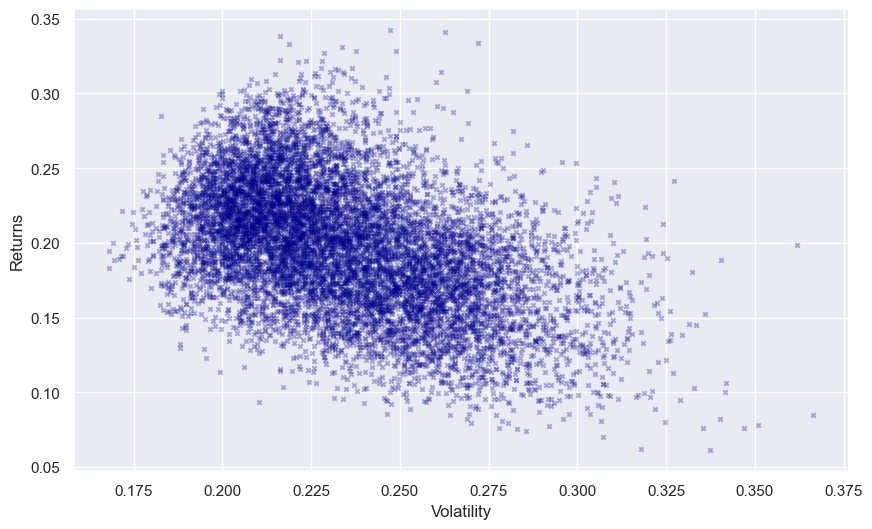

In [49]:
p_ret = []    #define an empty array for portfolio returns
p_vol = []    #dfine an empty array for portfolio volatility
p_weights = []    #define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 10000

#covariance matrix of the daily returns (relationship and co-movement between different stocks)
cov_matrix = daily_returns.cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)    #the sum of weights must be 1, so we divide those weights by their cumulative sum
    p_weights.append(weights)
    returns = np.dot(weights, annualized_returns)    #returns are the product of individual expected returns of asset and its weights 

    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()    #portfolio variance
    sd = np.sqrt(var)    #daily standard deviation
    ann_sd = sd*np.sqrt(250)    #annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns': p_ret, 'Volatility': p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
    # print(counter+1, symbol)
    data[symbol] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)

#plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='x', s=10, alpha=0.3, grid=True, figsize=[10,6], color='darkblue')

In [50]:
#find the portfolio with minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]    #idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns      0.195
Volatility   0.168
MRNA         0.034
PFE          0.078
JNJ          0.003
GOOGL        0.005
META         0.020
AAPL         0.065
MSFT         0.052
COST         0.077
WMT          0.114
KR           0.096
JPM          0.006
BAC          0.034
HSBC         0.114
SPY          0.095
GLD          0.098
^N225        0.086
CL=F         0.007
BTC-USD      0.016
Name: 1490, dtype: float64

In [51]:
#find the worst portfolio (lowest return-volatility ratio)
rf = 0.01    #risk factor
worst_risky_port = portfolios.iloc[((portfolios['Returns']-rf) / portfolios['Volatility']).idxmin()]    #idxmin() gives the index of the minimum value in the column specified
worst_risky_port

Returns      0.061
Volatility   0.337
MRNA         0.003
PFE          0.005
JNJ          0.027
GOOGL        0.054
META         0.115
AAPL         0.054
MSFT         0.027
COST         0.057
WMT          0.058
KR           0.088
JPM          0.108
BAC          0.052
HSBC         0.029
SPY          0.008
GLD          0.068
^N225        0.072
CL=F         0.147
BTC-USD      0.028
Name: 6273, dtype: float64

In [52]:
#find the optimal portfolio (highest return-volatility ratio)
rf = 0.01    #risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf) / portfolios['Volatility']).idxmax()]    #idxmax() gives the index of the maximum value in the column specified
optimal_risky_port

Returns      0.338
Volatility   0.216
MRNA         0.123
PFE          0.061
JNJ          0.074
GOOGL        0.020
META         0.003
AAPL         0.091
MSFT         0.021
COST         0.115
WMT          0.027
KR           0.020
JPM          0.075
BAC          0.013
HSBC         0.018
SPY          0.071
GLD          0.061
^N225        0.090
CL=F         0.004
BTC-USD      0.112
Name: 1762, dtype: float64

In [53]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

#convert the weights into actual allocations values (i.e., how many of each stock to buy) with an investment amount of $10,000
latest_prices = get_latest_prices(df)

da_opt = DiscreteAllocation(optimal_risky_port.iloc[2:].to_dict(), latest_prices, total_portfolio_value=10000)

allocation_opt, leftover_opt = da_opt.greedy_portfolio()
print("Discrete allocation:", sort_dict(allocation_opt))
print("Funds remaining: ${:.2f}".format(leftover_opt))

Discrete allocation: {'PFE': 12, 'AAPL': 7, 'MRNA': 6, 'JPM': 5, 'HSBC': 5, 'JNJ': 4, 'KR': 4, 'GLD': 3, 'BAC': 3, 'COST': 2, 'SPY': 2, 'WMT': 2, 'GOOGL': 2, 'MSFT': 1, 'CL=F': 1, 'META': 1}
Funds remaining: $2562.34


In [54]:
#find the portfolio with the maximum returns with a given (fixed) volatility
given_volatility = 0.18
rf = 0.01    #risk factor
portfolios_temp = portfolios.loc[(portfolios['Volatility'] > given_volatility-0.004) & (portfolios['Volatility'] < given_volatility+0.004)].reset_index(drop=True)
given_volatility_port = portfolios_temp.iloc[((portfolios_temp['Returns']-rf) / portfolios_temp['Volatility']).idxmax()]    #idxmax() gives the index of the maximum value in the column specified
given_volatility_port

Returns      0.285
Volatility   0.183
MRNA         0.100
PFE          0.046
JNJ          0.087
GOOGL        0.010
META         0.022
AAPL         0.095
MSFT         0.053
COST         0.038
WMT          0.033
KR           0.120
JPM          0.008
BAC          0.013
HSBC         0.088
SPY          0.020
GLD          0.116
^N225        0.083
CL=F         0.000
BTC-USD      0.065
Name: 49, dtype: float64

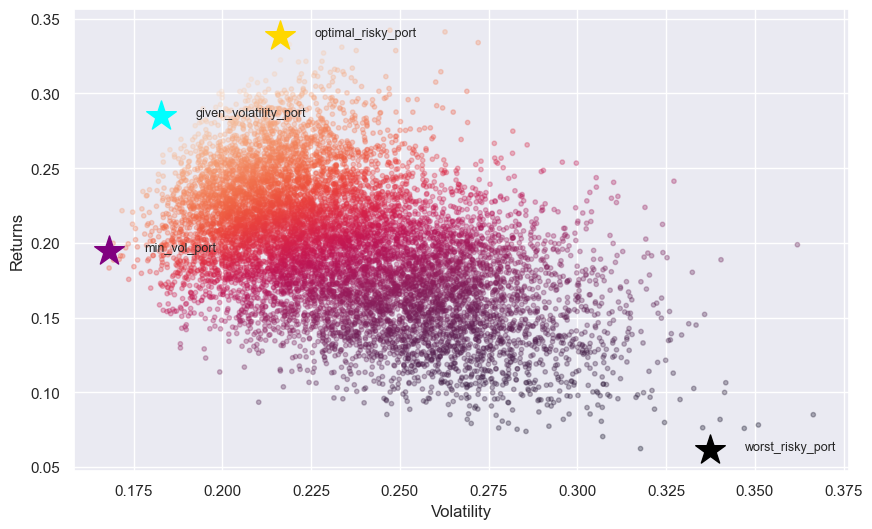

In [55]:
from matplotlib import pyplot as plt

#plot efficient frontier with optimal portfolio, etc
plt.subplots(figsize=(10,6))
sharpe_err = portfolios['Returns'] / portfolios['Volatility']
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=sharpe_err, s=10, alpha=0.3)
plt.xlabel('Volatility')
plt.ylabel('Returns')
port_plot = {'min_vol_port': min_vol_port, 'worst_risky_port': worst_risky_port, 'optimal_risky_port': optimal_risky_port, 'given_volatility_port': given_volatility_port}
port_color = {'min_vol_port': 'purple', 'worst_risky_port': 'black', 'optimal_risky_port': 'gold', 'given_volatility_port': 'cyan'}
for k in port_plot.keys():
    plt.scatter(port_plot[k][1], port_plot[k][0], color=port_color[k], marker='*', s=500)
    plt.text(port_plot[k][1]+.01, port_plot[k][0], k, fontsize=9)

--------------------------
To calculate Efficient Frontier using Python libraries. Import the EfficientFrontier module and calculate the weights.

Sharpe Ratio is the ratio between returns and risk. The algorithm looks for the maximum Sharpe ratio, which translates to the portfolio with the highest return and lowest risk.

In [25]:
from pypfopt import expected_returns
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

#calculate the covariance matrix and store the calculated returns in variables S and mu
mu = expected_returns.mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

#display portfolio performance, this return is inflated and is not likely to hold up in the future!
ef.portfolio_performance(verbose=True)

cleaned_weights = ef.clean_weights()
cleaned_weights = sort_dict(cleaned_weights)
cleaned_weights

Expected annual return: 45.1%
Annual volatility: 25.5%
Sharpe Ratio: 1.69


{'MRNA': 0.26443,
 'AAPL': 0.17975,
 'BTC-USD': 0.13273,
 'COST': 0.10265,
 'MSFT': 0.08056,
 'KR': 0.06656,
 'GLD': 0.04455,
 'WMT': 0.0364,
 '^N225': 0.03203,
 'JNJ': 0.03103,
 'SPY': 0.00984,
 'JPM': 0.00816,
 'CL=F': 0.00766,
 'PFE': 0.00366,
 'GOOGL': 0.0,
 'META': 0.0,
 'BAC': 0.0,
 'HSBC': 0.0}

In [26]:
#new instance of portfolio performance
ef2 = EfficientFrontier(mu, S)

ef2.efficient_risk(target_volatility=0.184)
ef2.portfolio_performance(verbose=True)

cleaned_weights2 = ef2.clean_weights()
cleaned_weights2 = sort_dict(cleaned_weights2)
cleaned_weights2

Expected annual return: 30.8%
Annual volatility: 18.4%
Sharpe Ratio: 1.57


{'MRNA': 0.14281,
 'AAPL': 0.10654,
 'COST': 0.08471,
 'GLD': 0.08422,
 'BTC-USD': 0.07792,
 'KR': 0.07723,
 '^N225': 0.07316,
 'MSFT': 0.06242,
 'WMT': 0.06032,
 'JNJ': 0.05863,
 'PFE': 0.04197,
 'SPY': 0.03759,
 'JPM': 0.03189,
 'GOOGL': 0.02568,
 'BAC': 0.01852,
 'HSBC': 0.0085,
 'CL=F': 0.00787,
 'META': 0.0}

In [28]:
from pypfopt import EfficientSemivariance

historical_returns = expected_returns.returns_from_prices(df)

ef3 = EfficientSemivariance(mu, historical_returns)
ef3.efficient_return(0.261)
ef3.portfolio_performance(verbose=True)

cleaned_weights3 = ef3.clean_weights()
cleaned_weights3 = sort_dict(cleaned_weights3)
cleaned_weights3

Expected annual return: 26.1%
Annual semi-deviation: 10.5%
Sortino Ratio: 2.29


{'GLD': 0.34766,
 'AAPL': 0.18535,
 '^N225': 0.17654,
 'MRNA': 0.10715,
 'COST': 0.08781,
 'KR': 0.08172,
 'BTC-USD': 0.01377,
 'PFE': 0.0,
 'JNJ': 0.0,
 'GOOGL': 0.0,
 'META': 0.0,
 'MSFT': 0.0,
 'WMT': 0.0,
 'JPM': 0.0,
 'BAC': 0.0,
 'HSBC': 0.0,
 'SPY': 0.0,
 'CL=F': 0.0}

In [29]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

#convert the weights into actual allocations values (i.e., how many of each stock to buy) with an investment amount of $10,000
latest_prices = get_latest_prices(df)

da_ef = DiscreteAllocation(cleaned_weights3, latest_prices, total_portfolio_value=10000)

allocation_ef, leftover_ef = da_ef.greedy_portfolio()
print('Discrete allocation:', sort_dict(allocation_ef))
print('Funds remaining: ${:.2f}'.format(leftover_ef))

Discrete allocation: {'GLD': 20, 'KR': 18, 'AAPL': 14, 'MRNA': 5, 'COST': 2}
Funds remaining: $2192.27


------------------------------
### Comparison of the 3 discrete allocations

We are now ready to compare the 3 discrete allocations described so far.

The different portfolio allocation approaches seem to be able to identify exactly how much of each stock to buy to build a diversified portfolio. Using the bagging principle, I would suggest the follow portfolio mix:
* Healthcare: Pfizer (PFE)
* Tech: Apple (AAPL)
* Retail: Kroger Co (KR)
* Finance: HSBC Holding (HSBC)
* Others: SPDR Gold Trust (GLD)

Please be wary of the common warning label in investment brochures: <br>
**"Past performance is no guarantee of future results"** <br>
Don't assume an investment will continue to do well in the future simply because it has done well in the past.

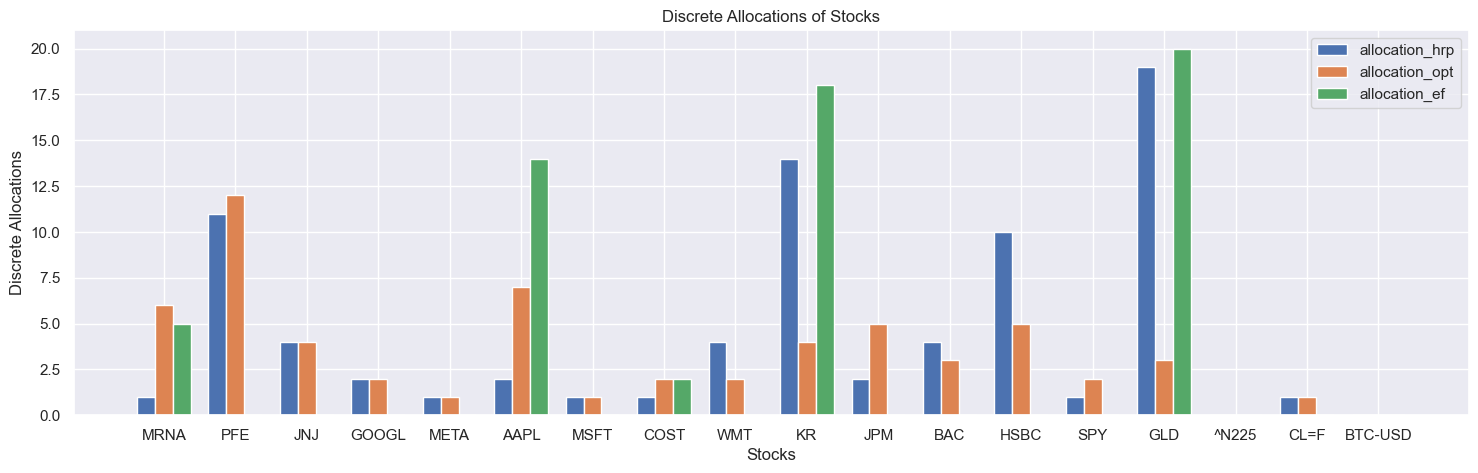

In [56]:
#rearrange the dicts to have identical sequence
allocation_hrp2, allocation_opt2, allocation_ef2 = {}, {}, {}
for name in stocknames:
    allocation_hrp2[name] = allocation_hrp.get(name, 0)
    allocation_opt2[name] = allocation_opt.get(name, 0)
    allocation_ef2[name] = allocation_ef.get(name, 0)

#plot the comparison bar chart
idx = np.arange(len(stocknames))
barwidth = 0.25
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(idx-barwidth, allocation_hrp2.values(), barwidth, label="allocation_hrp")
ax.bar(idx, allocation_opt2.values(), barwidth, label="allocation_opt")
ax.bar(idx+barwidth, allocation_ef2.values(), barwidth, label="allocation_ef")
ax.set_title('Discrete Allocations of Stocks')
ax.set_xlabel('Stocks')
ax.set_ylabel('Discrete Allocations')
ax.set_xticks(idx)
ax.set_xticklabels(['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'MSFT', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC', 'SPY', 'GLD', '^N225', 'CL=F', 'BTC-USD'])
ax.legend()
plt.show()